In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('D:/Da/train_0irEZ2H.csv')
test = pd.read_csv('D:/Da/test_nfaJ3J5.csv')
ss = pd.read_csv('D:/Da/sample_submission_pzljTaX.csv')

In [5]:
train.shape

(150150, 9)

In [7]:
test.shape

(13860, 8)

In [9]:
ss.shape

(13860, 2)

In [11]:
df = train.copy()

In [13]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


# Data Cleaning

In [15]:
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [17]:
df = df.dropna()

In [19]:
df[df.duplicated()]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150149 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150149 non-null  int64  
 1   week             150149 non-null  object 
 2   store_id         150149 non-null  int64  
 3   sku_id           150149 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150149 non-null  float64
 6   is_featured_sku  150149 non-null  int64  
 7   is_display_sku   150149 non-null  int64  
 8   units_sold       150149 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 11.5+ MB


In [23]:
df['week'] = pd.to_datetime(df['week'], format='%d/%m/%y')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150149 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150149 non-null  int64         
 1   week             150149 non-null  datetime64[ns]
 2   store_id         150149 non-null  int64         
 3   sku_id           150149 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150149 non-null  float64       
 6   is_featured_sku  150149 non-null  int64         
 7   is_display_sku   150149 non-null  int64         
 8   units_sold       150149 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 11.5 MB


<Axes: xlabel='total_price', ylabel='Count'>

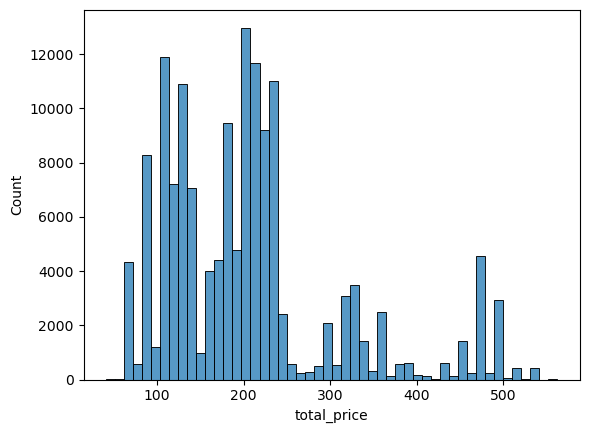

In [27]:
sns.histplot(df['total_price'], bins=50)

<Axes: xlabel='base_price', ylabel='Count'>

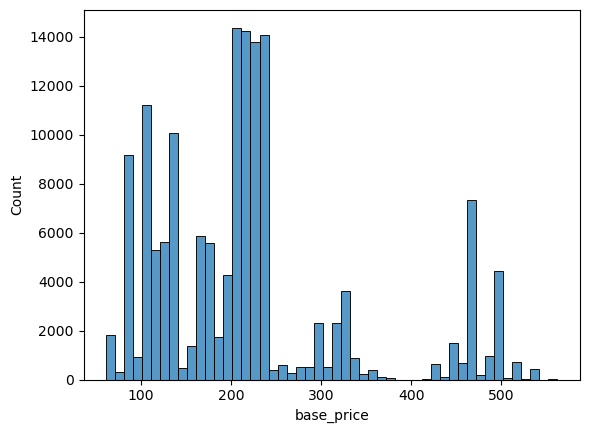

In [29]:
sns.histplot(df['base_price'], bins=50)

<Axes: >

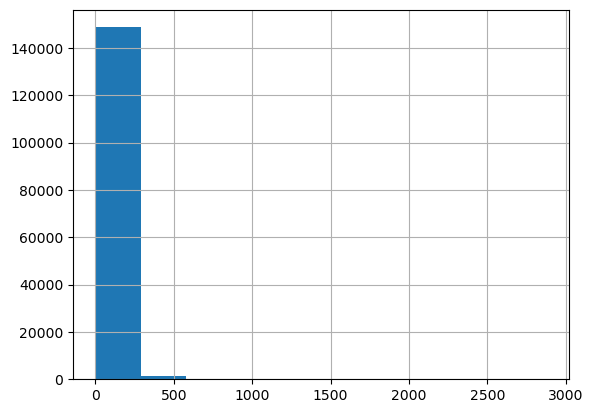

In [31]:
df['units_sold'].hist()

<Axes: >

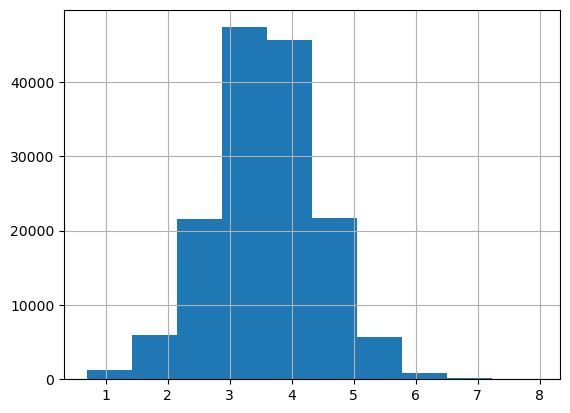

In [33]:
np.log1p(df['units_sold']).hist()

In [35]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52


In [81]:
u_sold = df.groupby('store_id')['units_sold'].sum().sort_values(ascending=False)

In [90]:
u_s= u_sold.head(15)

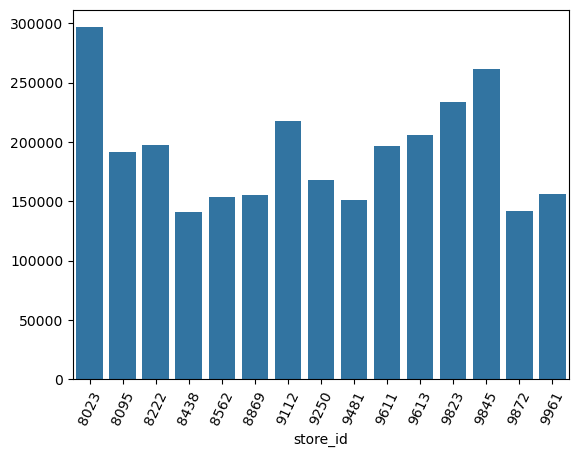

In [96]:
sns.barplot( x=u_s.index, y=u_s.values)
plt.xticks(rotation=65)
plt.show()

## Saprate ['year', 'month', 'day'] from ['week'] column

In [104]:
df['week'] = df['week'].astype(str)

In [106]:
df[['year', 'month', 'day']] = df['week'].str.split('-', expand=True)

In [114]:
ys = df.groupby('year')['units_sold'].sum()

<Axes: xlabel='year'>

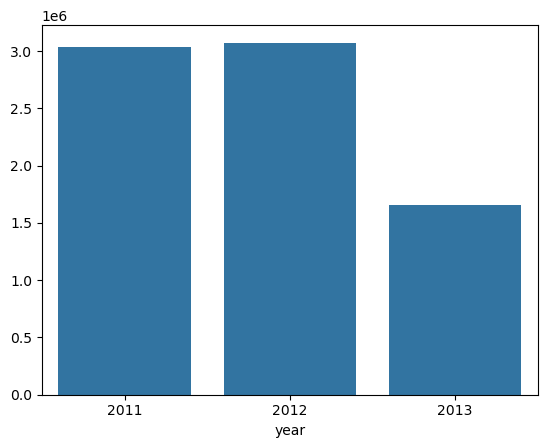

In [126]:
sns.barplot(x=ys.index, y=ys.values)

In [116]:
ys

year
2011    3031385
2012    3071886
2013    1655610
Name: units_sold, dtype: int64

<Axes: >

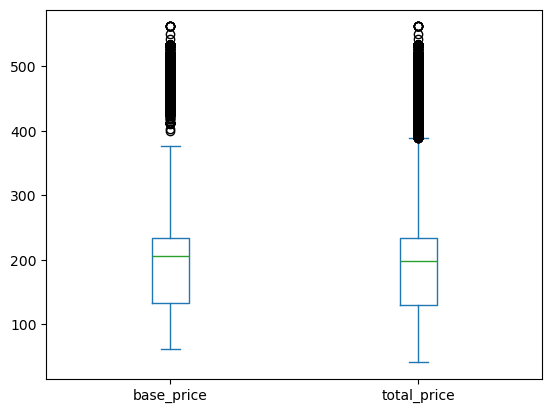

In [128]:
df[['base_price', 'total_price']].plot.box()

In [130]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [134]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


# Creating some new features on price

In [154]:
df['dif_bt'] = train['base_price'] - train['total_price']

df['rd_base'] = train['dif_bt']/train['base_price']
df['rd_total'] = train['dif_bt']/train['total_price']

In [156]:
df.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,dif_bt,rd_base,rd_total
0,1,8091,216418,99.0375,111.8625,0,0,20,2011,01,17,12.825,0.11465,0.129496
1,2,8091,216419,99.0375,99.0375,0,0,28,2011,01,17,0.000,0.00000,0.000000
2,3,8091,216425,133.9500,133.9500,0,0,19,2011,01,17,0.000,0.00000,0.000000
3,4,8091,216233,133.9500,133.9500,0,0,44,2011,01,17,0.000,0.00000,0.000000
4,5,8091,217390,141.0750,141.0750,0,0,52,2011,01,17,0.000,0.00000,0.000000


In [158]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,dif_bt,rd_base,rd_total
count,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000
mean,106270.971795,9199.420935,254761.195226,206.626751,219.424262,0.095612,0.133201,51.674543,12.797511,0.048911,0.068560
std,61385.825580,615.593192,85547.587866,103.308516,110.960204,0.294059,0.339793,60.207962,31.641315,0.103104,0.164064
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000,-106.875000,-0.515152,-0.340000
25%,53111.000000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
50%,106226.000000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000
75%,159452.000000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000,0.000000,0.000000,0.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000,250.800000,0.823708,4.672414


In [144]:
df = df.drop('week', axis=1)

<Axes: >

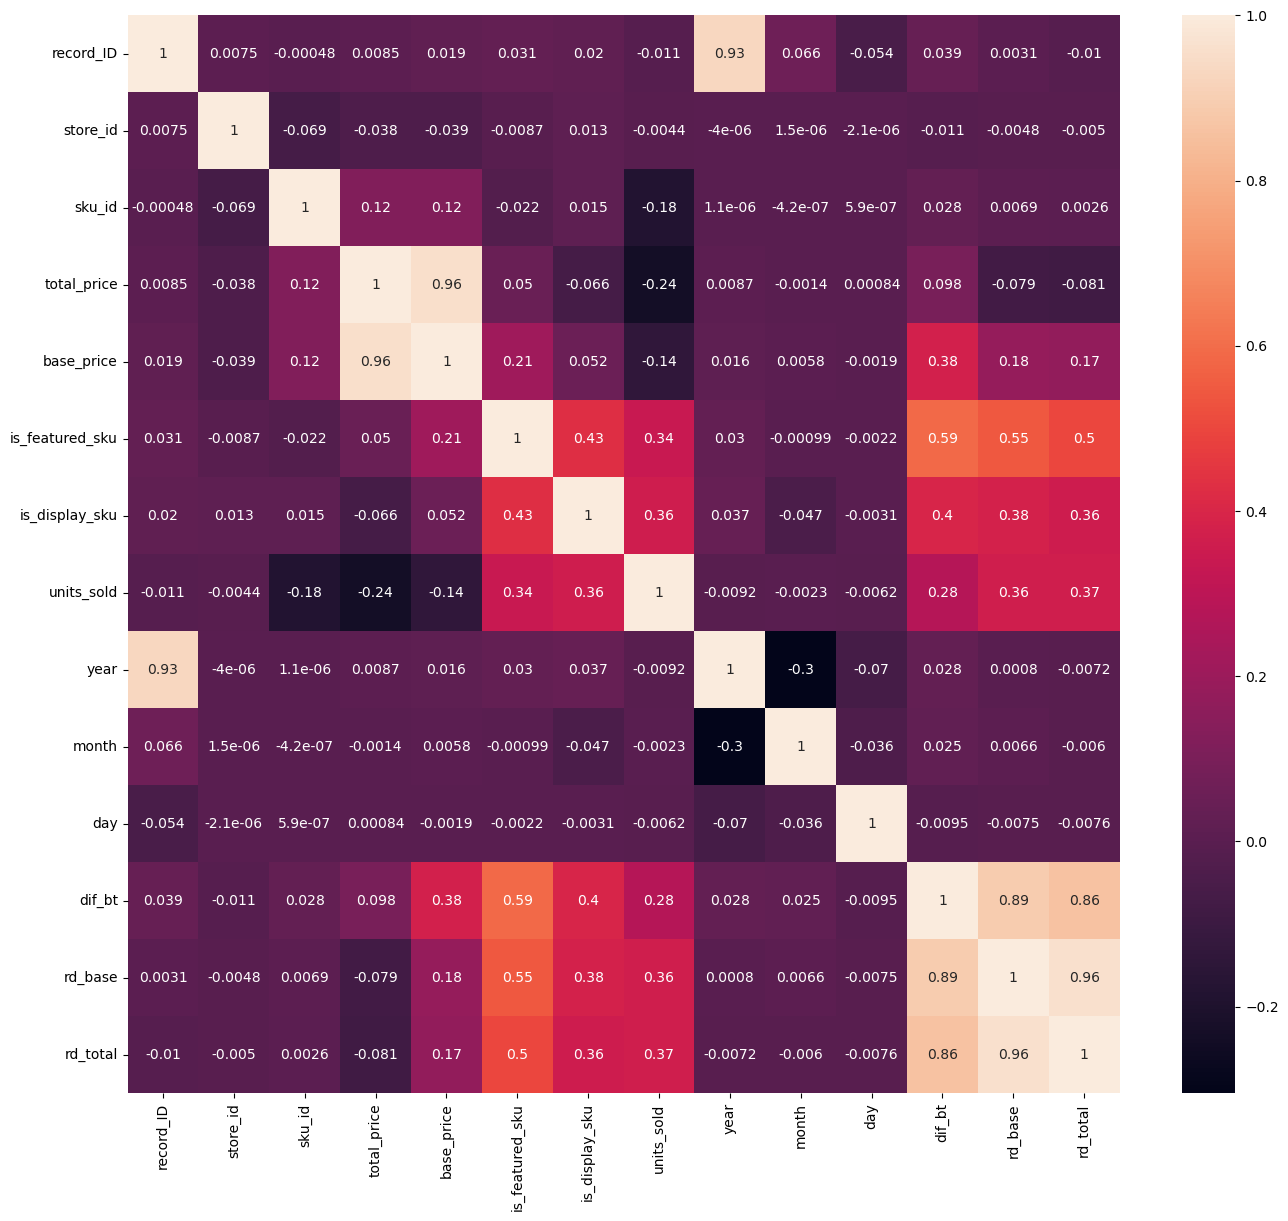

In [162]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(), annot=True)

In [168]:
df.columns

Index(['record_ID', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold', 'year', 'month',
       'day', 'dif_bt', 'rd_base', 'rd_total'],
      dtype='object')

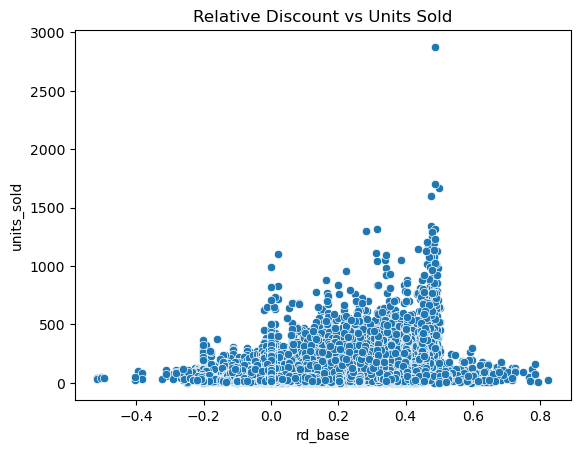

In [172]:
sns.scatterplot(data=df, x='rd_base', y='units_sold')
plt.title('Relative Discount vs Units Sold')
plt.show()

In [174]:
df.columns

Index(['record_ID', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold', 'year', 'month',
       'day', 'dif_bt', 'rd_base', 'rd_total'],
      dtype='object')

In [183]:
df.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,dif_bt,rd_base,rd_total
0,1,8091,216418,99.0375,111.8625,0,0,20,2011,01,17,12.825,0.11465,0.129496
1,2,8091,216419,99.0375,99.0375,0,0,28,2011,01,17,0.000,0.00000,0.000000
2,3,8091,216425,133.9500,133.9500,0,0,19,2011,01,17,0.000,0.00000,0.000000
3,4,8091,216233,133.9500,133.9500,0,0,44,2011,01,17,0.000,0.00000,0.000000
4,5,8091,217390,141.0750,141.0750,0,0,52,2011,01,17,0.000,0.00000,0.000000


In [ ]:
sco = [[]]

# Model Selecting

In [293]:
X = df[['total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'dif_bt', 'rd_base', 'rd_total']]
y = df['units_sold']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [189]:
models = {
    'rf' : RandomForestRegressor(random_state=42),
    'gb' : GradientBoostingRegressor(random_state=42),
    'xg' : XGBRegressor(random_state=42)
}

In [195]:
result = []

for name, model in models.items():
    model.fit(X_train, y_train)

    yp = model.predict(X_test)

    r2 = r2_score(yp, y_test)
    mse = mean_squared_error(yp, y_test)

    result.append({
        'Model'  : name,
        'r2_score' : r2,
        'mse' : mse
    })    

In [197]:
result

[{'Model': 'rf', 'r2_score': 0.6995754648388036, 'mse': 862.6411902162025},
 {'Model': 'gb', 'r2_score': 0.21189339073897773, 'mse': 1311.778123807849},
 {'Model': 'xg', 'r2_score': 0.7255799770355225, 'mse': 710.4050168514458}]

## Light BGM

RMSE: 25.3278634479798


r2: 0.8039693027963799


In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function for Optuna
def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10)
    }

    # Train LightGBM
    model = lgb.LGBMRegressor(**param)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='rmse', early_stopping_rounds=50, verbose=False)

    # Predict
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

# Optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)


In [231]:
best_params = study.best_trial.params
print("Best Parameters:", best_params)

Best Parameters: {'num_leaves': 146, 'learning_rate': 0.06808201130229415, 'n_estimators': 451, 'feature_fraction': 0.7430904372944479, 'bagging_fraction': 0.978275964121836, 'bagging_freq': 5}


In [234]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [237]:
model = lgb.LGBMRegressor(
    num_leaves=146,
    learning_rate=0.06808201130229415,
    n_estimators=451,
    feature_fraction=0.7430904372944479,
    bagging_fraction=0.978275964121836,
    bagging_freq=5
)

# Train the model
model.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.978275964121836, bagging_freq=5,
              feature_fraction=0.7430904372944479,
              learning_rate=0.06808201130229415, n_estimators=451,
              num_leaves=146)

In [241]:
y_pred = model.predict(X_test)

In [243]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("r2:", r2)

RMSE: 24.757506553096604
r2: 0.8126987060228666


# Feature Importance

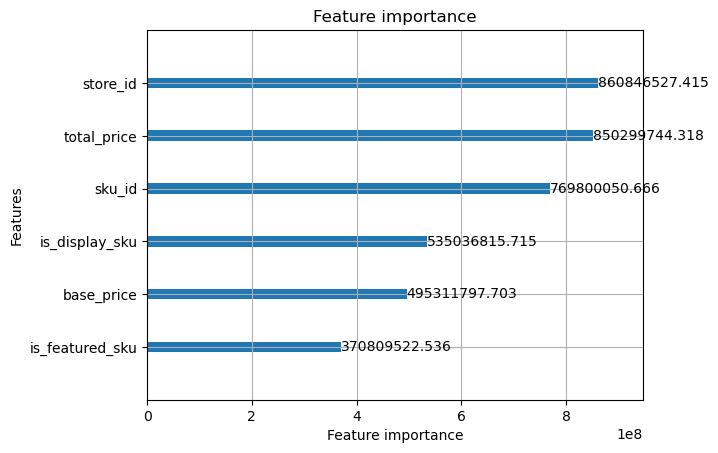

In [214]:
lgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.show()

# Train a LightBGM Model on Entire Data

In [295]:
model = lgb.LGBMRegressor(
    num_leaves=146,
    learning_rate=0.06808201130229415,
    n_estimators=451,
    feature_fraction=0.7430904372944479,
    bagging_fraction=0.978275964121836,
    bagging_freq=5
)

# Train the model
model.fit(X, y)

LGBMRegressor(bagging_fraction=0.978275964121836, bagging_freq=5,
              feature_fraction=0.7430904372944479,
              learning_rate=0.06808201130229415, n_estimators=451,
              num_leaves=146)

In [297]:
XO

,total_price,base_price,is_featured_sku,is_display_sku,dif_bt,rd_base,rd_total
0,99.0375,111.8625,0,0,12.8250,0.114650,0.129496
1,99.0375,99.0375,0,0,0.0000,0.000000,0.000000
2,133.9500,133.9500,0,0,0.0000,0.000000,0.000000
3,133.9500,133.9500,0,0,0.0000,0.000000,0.000000
4,141.0750,141.0750,0,0,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,0.0000,0.000000,0.000000
150146,235.8375,235.8375,0,0,0.0000,0.000000,0.000000
150147,357.6750,483.7875,1,1,126.1125,0.260677,0.352590
150148,141.7875,191.6625,0,1,49.8750,0.260223,0.351759


In [284]:
test['dif_bt'] = test['base_price'] - test['total_price']

test['rd_base'] = test['dif_bt']/test['base_price']
test['rd_total'] = test['dif_bt']/test['total_price']

In [299]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,dif_bt,rd_base,rd_total
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0,0.0,0.0,0.0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0,0.0,0.0,0.0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0,0.0,0.0,0.0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0,0.0,0.0,0.0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0,0.0,0.0,0.0


In [301]:
X_test = test.drop(['record_ID', 'week', 'store_id','sku_id'], axis=1)

In [303]:
test_predictions = model.predict(X_test)

In [307]:
test['predicted_units_sold'] = test_predictions

In [309]:
test.to_csv('test_data_with_predictions.csv', index=False)

In [311]:
print(test[['record_ID', 'predicted_units_sold']].head())

   record_ID  predicted_units_sold
0     212645             77.439630
1     212646             74.446916
2     212647             46.391670
3     212648             46.391670
4     212649             64.990654
